## Quantum Circuits Overview

Let's fully cover all the important aspects of Quantum circuits. 

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [2]:
circuit = QuantumCircuit(1) # QuantumCircuit() generates the circuit

circuit.h(0) # Hadamard Gate on the Qubit of index 0 (there's only one qubit)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw()) # We can display the circuit

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

If we wish to set the name of our single qubit to something other than `q`, we use the `QuantumRegister` class like this: 

In [4]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In Qiskit, the *topmost* qubit in a circuit diagram has index 0 and corresponds to the *rightmost* position in a tuple of qubits. Qiskit's default names for the qubits in an $n$-qubit circuit are represented by the $n$-tuple $(q_{n-1}, \cdots, q_0)$, with $q_0$ being the qubit on top and $q_{n-1}$ on the bottom in quantum circuit diagrams. 

We can also create a 2-qubit gate like so: 

In [5]:
circuit_default = QuantumCircuit(2)

circuit_default.h(0)
circuit_default.cx(0, 1)

display(circuit_default.draw())

#-----------------------------#

X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")

circuit_named = QuantumCircuit(X, Y)

circuit_named.h(X)
circuit_named.cx(X, Y)

display(circuit_named.draw())

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

┌───┐     
X: ┤ H ├──■──
   └───┘┌─┴─┐
Y: ─────┤ X ├
        └───┘

We have created two identical circuits, one default-named, and the other custom. Both circuits contain a Hadamard Gate on the first qubit and a CNOT gate with the first qubit as the control and the second as the target. 

Let's see the action of the above circuit on the standard computational basis states for a 2-qubit system: 

$$|00\rangle \quad |01\rangle \quad |10\rangle \quad |11\rangle$$

In [8]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")

standard_basis_states = [zero.tensor(zero), zero.tensor(one), 
                         one.tensor(zero), one.tensor(one)]

names = ["|00>", "|01>", "|10>", "|11>"]

for i in range(len(standard_basis_states)): 
    print(f"{names[i]} -->")
    display(standard_basis_states[i].evolve(circuit_named).draw("latex"))

|00> -->


<IPython.core.display.Latex object>

|01> -->


<IPython.core.display.Latex object>

|10> -->


<IPython.core.display.Latex object>

|11> -->


<IPython.core.display.Latex object>

The cool thing about the circuit above, as you see, it generates the bell states (entangled states that form a basis): 

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|11\rangle $$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle $$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}|01\rangle - \frac{1}{\sqrt{2}}|10\rangle $$

except the final $|11\rangle$ state becomes the negative of the fourth $|\psi^-\rangle$ bell state. 

So this circuit gives us a way to convert the standard computational basis into the Bell Basis. The -1 phase factor on the last state, $-|\psi^-\rangle$ could be eliminated if we wanted. For instance, we could add a controlled-Z gate at the beginning. (The Z gate performs the bit-flip operation. So a controlled-Z would perform a bit-flip if the first qubit is 1 --> turning $|11\rangle$ into -$|11\rangle$)

Here is the altered circuit shown: 

In [9]:
circuit = QuantumCircuit(2)

circuit.cz(0, 1)
circuit.h(0)
circuit.cx(0, 1)

circuit.draw()

┌───┐     
q_0: ─■─┤ H ├──■──
      │ └───┘┌─┴─┐
q_1: ─■──────┤ X ├
             └───┘

Implementing the above circuit on the standard computational basis states: 

In [11]:
for i in range(len(standard_basis_states)):
    print(f"{names[i]} --> ")
    display(standard_basis_states[i].evolve(circuit).draw("latex"))

|00> --> 


<IPython.core.display.Latex object>

|01> --> 


<IPython.core.display.Latex object>

|10> --> 


<IPython.core.display.Latex object>

|11> --> 


<IPython.core.display.Latex object>

which is identical to the Bell Basis! 

In general, quantum circuits can contain any number of qubit wires. We may also include classical bit wires, indicated by **double** lines:

In [13]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B") # Using `Classical Register` to customize the name
                              # for two separate classical bits

circuit = QuantumCircuit(X, Y, A, B)
circuit.h(X)
circuit.cx(X, Y)
circuit.measure(X, A)
circuit.measure(Y, B)

display(circuit.draw())

┌───┐     ┌─┐   
  X: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  Y: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
A: 1/═══════════╩══╬═
                0  ║ 
B: 1/══════════════╩═
                   0

In this circuit, we have the same hadamard gate & CNOT on two qubits, just like in the previous example. However now we also have two ***classical**** bits, A and B, with two measurement gates. The measurement gates represent standard basis measurements (resulting in either $|0\rangle$ or $|1\rangle$ as the eigenvectors). The qubits are changed to their post-measurement states, while the classical measurement outcomes are *overwritten* onto the classical bits to which the arrows point. 

The circuit can be simulated using the `Sampler()` primitive. 

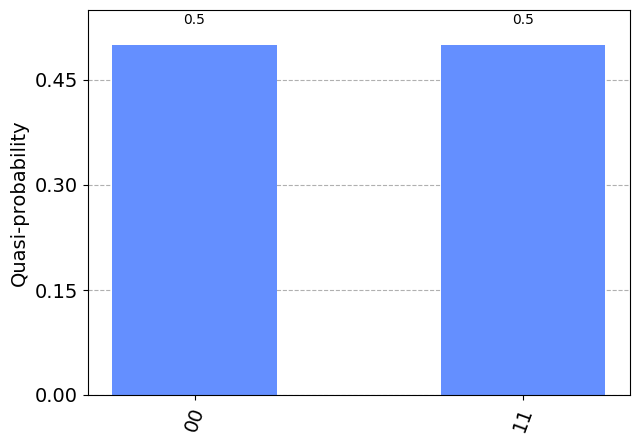

In [15]:
sampler = Sampler() # Initialize Sampler
job = sampler.run(circuit) 
results = job.result()

statistics = results.quasi_dists[0].binary_probabilities()
plot_histogram(statistics)

The `Sampler()` primitive samples outputs of quantum circuits. It displays the **exact** measurement probabilities of a circuit if the `shots` parameter is not specified. We use it by calling its `run()` method with the circuit. This resuls a `BasePrimitiveJob` object, where calling the method `result()` results in output samples and corresponding metadata.

It is not important to memorize how to use primitives or any of these methods. I just used them to display how there is an equal probability of yielding the eigenvectors $|00\rangle$ and $|11\rangle$ (because the hadamard and CNOT yield the bell basis) and how they changed into 00 and 11 following the measurement gate onto the classical bit wires. 

## Quantum Circuits Review

Let's play with some qubits and bits in a complicated circuit and plot the resultant probabilities.

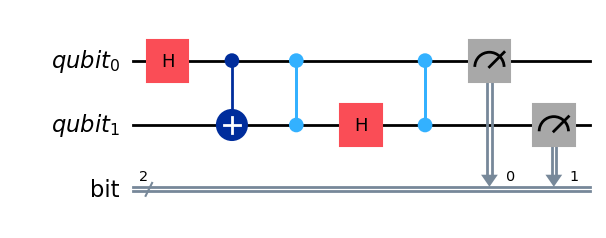

In [18]:
q = QuantumRegister(2, name = 'qubit')
c = ClassicalRegister(2, name = 'bit')

circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.cx(q[0], q[1])      # Note you do not have to specify q[...]
circuit.cz(q[1], q[0])      # I just do it for readability
circuit.h(q[1])
circuit.cz(q[0], q[1])
circuit.measure(q, c)

circuit.draw('mpl')

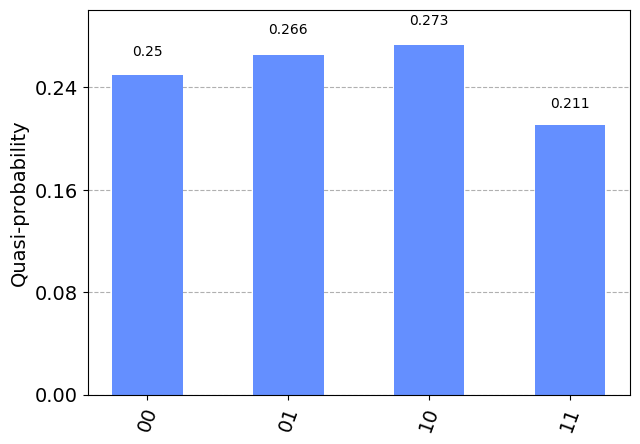

In [19]:
sampler = Sampler() # sampler initialization

job = sampler.run(circuit, shots = 128) # sampling 128 runs
results = job.result()

statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

We see we get roughly an equal 1/4 probabilitiy to yield each computational basis state in its classical form. Let us see this result more closely by performing this circuit on the computational basis states: 

In [20]:
# Generating the same circuit, but without the measurement gates
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)      
circuit.cz(1, 0)      
circuit.h(1)
circuit.cz(0, 1)

zero, one = Statevector.from_label("0"), Statevector.from_label("1")

standard_basis_states = [zero.tensor(zero), zero.tensor(one), 
                         one.tensor(zero), one.tensor(one)]
names = ["|00>", "|01>", "|10>", "|11>"]

for i in range(len(standard_basis_states)): 
    print(f"{names[i]} -->")
    display(standard_basis_states[i].evolve(circuit).draw("latex"))

|00> -->


<IPython.core.display.Latex object>

|01> -->


<IPython.core.display.Latex object>

|10> -->


<IPython.core.display.Latex object>

|11> -->


<IPython.core.display.Latex object>

Here we can clearly see the probabilities for all eigenvectors are 1/4. 

However, let us apply the circuit on a different statevector. 

In [22]:
plus = Statevector.from_label("+")
vec = Statevector([(1 + 2.0j)/3, -2/3])
statevec = plus.tensor(vec)

display(statevec.draw('latex'))

<IPython.core.display.Latex object>

In [23]:
statevec.evolve(circuit).draw('latex')

<IPython.core.display.Latex object>

Now the only possible measurements are either $|00\rangle$ or $|11\rangle$! 